<a href="https://colab.research.google.com/github/cmcne007/ML-Spr2023/blob/main/project/imageclassification/ChakeithaMcNearMiller_imageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import tensorflow as tf 
import matplotlib.pyplot as plt 
from tqdm import tqdm
from keras import layers
from keras import models
from keras import optimizers
from keras.utils import to_categorical
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.utils import shuffle 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/14986.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/3138.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/1700.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/16257.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/2863.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/771.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/12167.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/17643.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/6560.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/10162.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/4009.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/15823.jpg
/kaggle/input/intel-image-classification/seg_tr

In [ ]:
#define/classify the images in order to pre-define the classes
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
imgClass_classes = len(class_names)
IMAGE_SIZE = (150, 150)

# Load the Data

In [ ]:
#load_data function to load images and labels from folder
def load_data():

    #load images to train network and test how accurate the network learned to classify images
    datasets = ['/kaggle/input/intel-image-classification/seg_train/seg_train', '/kaggle/input/intel-image-classification/seg_test/seg_test']
    output = []
    
    # iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append image and corresponding label to output
                images.append(image)
                labels.append(label)
                
        # utilize numpy arrays to set type for images and labels
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [ ]:
#let's get the images and labels from Training and Test Dataset
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading /kaggle/input/intel-image-classification/seg_train/seg_train


100%|██████████| 2404/2404 [00:18<00:00, 130.47it/s]


Loading /kaggle/input/intel-image-classification/seg_test/seg_test


100%|██████████| 553/553 [00:03<00:00, 150.40it/s]


In [ ]:
#let's see how many train examples we have and see the size of the images
train_images.shape

(14034, 150, 150, 3)

In [ ]:
#let's see how many test examples we have and see the size of the images
test_images.shape

(3000, 150, 150, 3)

In [ ]:
#create and shuffle the training data
train_images, train_labels = shuffle(train_images, train_labels, random_state=42)

# Visualize the data

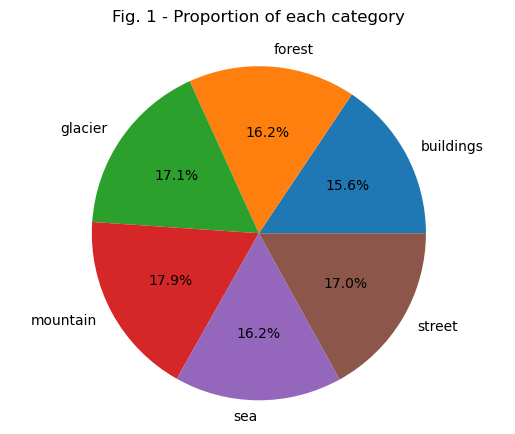

In [ ]:
#let's display a figure to show the proportions of each category
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Fig. 1 - Proportion of each category\n')
plt.show()

In [ ]:
#scale the data
train_images = train_images / 255.0 
test_images = test_images / 255.0

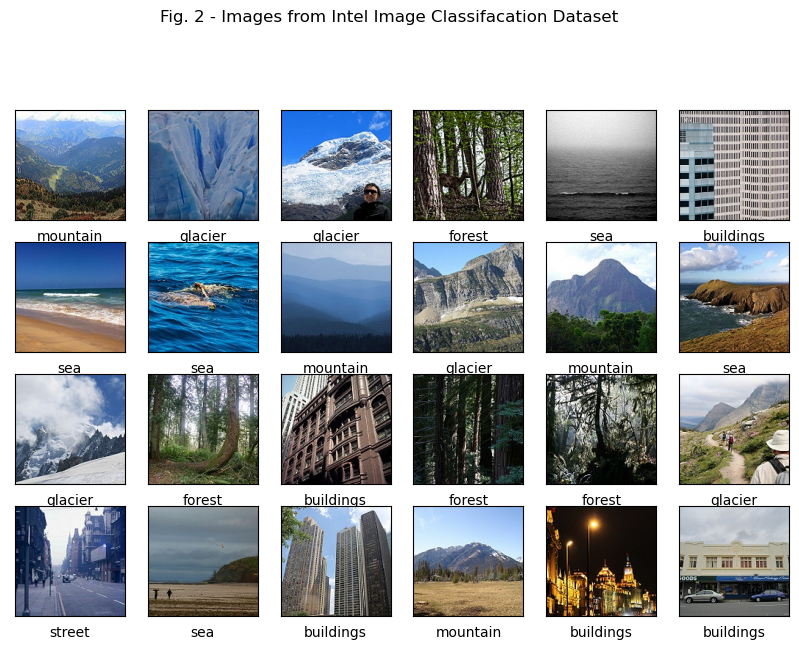

In [ ]:
#let's display random images from training dataset
plt.figure(figsize=(10,10))
plt.suptitle("Fig. 2 - Images from Intel Image Classifacation Dataset")
for i in range(24):
    plt.subplot(6, 6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()



# Create compile a fully connected model

In [ ]:
#adding the ConvNet layers
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [ ]:
#compile the network, 
model.compile(loss = 'sparse_categorical_crossentropy', #Loss function: we use sparse categorical crossentropy for classification, each images belongs to one class only
              optimizer = tf.keras.optimizers.SGD(lr = 0.001, momentum=0.9, nesterov=True), #Momentum takes into acct past gradient having a better update
              metrics = ['acc'])

In [ ]:
#train and fit the model
history = model.fit(
    train_images, train_labels, 
    batch_size=128, 
    epochs=20, 
    validation_split = 0.2)

Epoch 1/20
88/88 [==============================] - 23s 92ms/step - loss: 1.3480 - acc: 0.4705 - val_loss: 1.0351 - val_acc: 0.6010
Epoch 2/20
88/88 [==============================] - 5s 61ms/step - loss: 0.8814 - acc: 0.6662 - val_loss: 0.8535 - val_acc: 0.6687
Epoch 3/20
88/88 [==============================] - 6s 69ms/step - loss: 0.7413 - acc: 0.7271 - val_loss: 0.7704 - val_acc: 0.7150
Epoch 4/20
88/88 [==============================] - 6s 65ms/step - loss: 0.6049 - acc: 0.7755 - val_loss: 0.7918 - val_acc: 0.7143
Epoch 5/20
88/88 [==============================] - 6s 69ms/step - loss: 0.5077 - acc: 0.8144 - val_loss: 0.7303 - val_acc: 0.7364
Epoch 6/20
88/88 [==============================] - 6s 68ms/step - loss: 0.3964 - acc: 0.8614 - val_loss: 0.7919 - val_acc: 0.7471
Epoch 7/20
88/88 [==============================] - 5s 62ms/step - loss: 0.2860 - acc: 0.8998 - val_loss: 0.8252 - val_acc: 0.7463
Epoch 8/20
88/88 [==============================] - 5s 62ms/step - loss: 0.2032 - 

# Run the Model on the test data

In [ ]:
#evaluate loss and accuracy on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

94/94 [==============================] - 1s 9ms/step - loss: 1.3709 - acc: 0.7583


# Graph the Loss and Accuracy

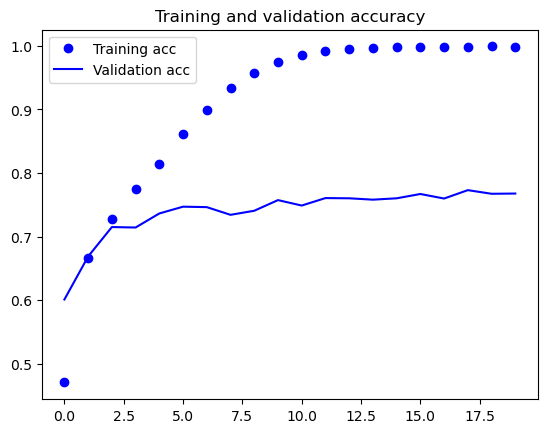

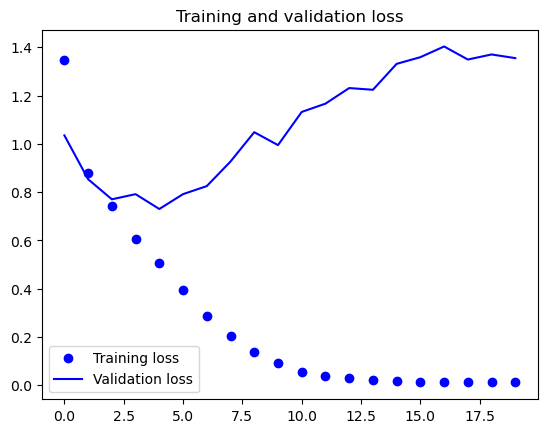

In [ ]:
#plot the training and validation loss / training and validation accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()